In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
import sklearn.datasets as sd
import sklearn.utils as su
import sklearn.metrics as sm
import sklearn.model_selection as ms
import sklearn.preprocessing as sp
import sklearn.pipeline as pl
import sklearn.tree as st
import sklearn.ensemble as se
import sklearn.linear_model as lm
import sklearn.svm as svm
import sklearn.naive_bayes as nb
import sklearn.cluster as sc

In [4]:
data = pd.read_csv('multiple3.txt', header=None, names=['x1', 'x2'])
data

,x1,x2
0,1.96,-0.09
1,2.84,3.16
2,4.74,1.84
3,6.36,4.89
4,1.77,1.55
...,...,...
195,6.64,6.66
196,2.15,0.75
197,3.26,6.08
198,5.72,1.98


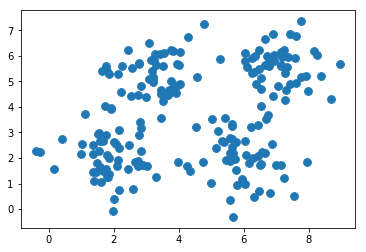

In [5]:
plt.scatter(data['x1'], data['x2'], s=60)

## K Means Clustering

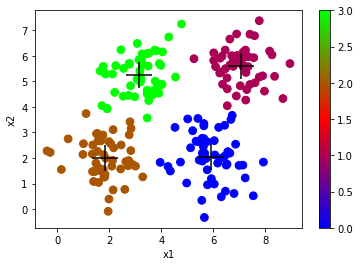

In [6]:
model = sc.KMeans(n_clusters=4)
model.fit(data)
data.plot.scatter('x1', 'x2', s=60, c=model.labels_, cmap='brg')
plt.scatter(model.cluster_centers_[:, 0],
            model.cluster_centers_[:, 1],
            s=700,
            c='black',
            marker='+')

In [7]:
test_x = [[8, 1]]
predictions = model.predict(test_x)
predictions

array([0])

## Mean Shift

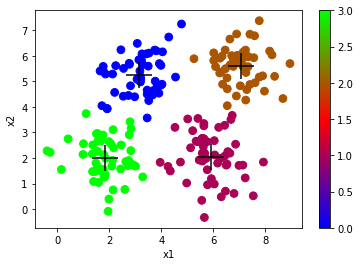

In [8]:
bw = sc.estimate_bandwidth(data, n_samples=len(data), quantile=0.1)
model = sc.MeanShift(bandwidth=bw, bin_seeding=True)
model = sc.KMeans(n_clusters=4)
model.fit(data)
data.plot.scatter('x1', 'x2', s=60, c=model.labels_, cmap='brg')
plt.scatter(model.cluster_centers_[:, 0],
            model.cluster_centers_[:, 1],
            s=700,
            c='black',
            marker='+')

## Silhouette Score

In [9]:
print(
    sm.silhouette_score(data,
                        model.labels_,
                        sample_size=len(data),
                        metric='euclidean'))

0.5773232071896658


## DBSCAN

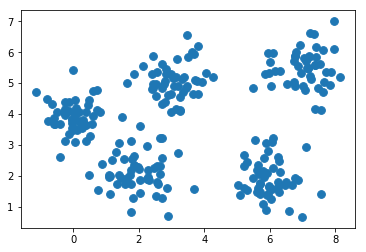

In [10]:
data = pd.read_csv('perf.txt', header=None, names=['x1', 'x2'])
plt.scatter(data['x1'], data['x2'], s=60)

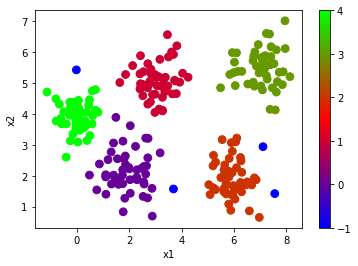

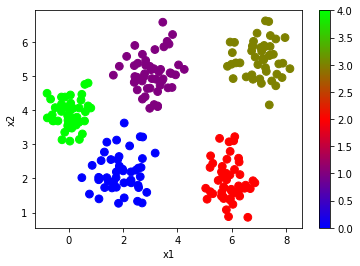

In [11]:
# 训练DBSCAN模型，基于轮廓系数，优选最优半径
eps = np.arange(0.3, 1.3, 0.1)
models = []
scores = []
for epsilon in eps:
    model = sc.DBSCAN(eps=epsilon, min_samples=5)
    model.fit(data)
    labels = model.labels_
    score = sm.silhouette_score(data,
                                labels,
                                sample_size=len(data),
                                metric='euclidean')
    models.append(model)
    scores.append(score)

# 获取最优得分，最优半径，最优模型
bestind = np.argmax(scores)
besteps, bestscore, bestmodel = eps[bestind], scores[bestind], models[bestind]
labels = bestmodel.labels_
data.plot.scatter('x1', 'x2', s=60, c=labels, cmap='brg')
core_sample_indices = bestmodel.core_sample_indices_
core_data = data.iloc[core_sample_indices]
core_label = labels[core_sample_indices]
core_data.plot.scatter(x='x1', y='x2', s=60, cmap='brg', c=core_label)